<a href="https://colab.research.google.com/github/Chu-Yichen/BASC0080-Computer-Simulation/blob/main/First_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

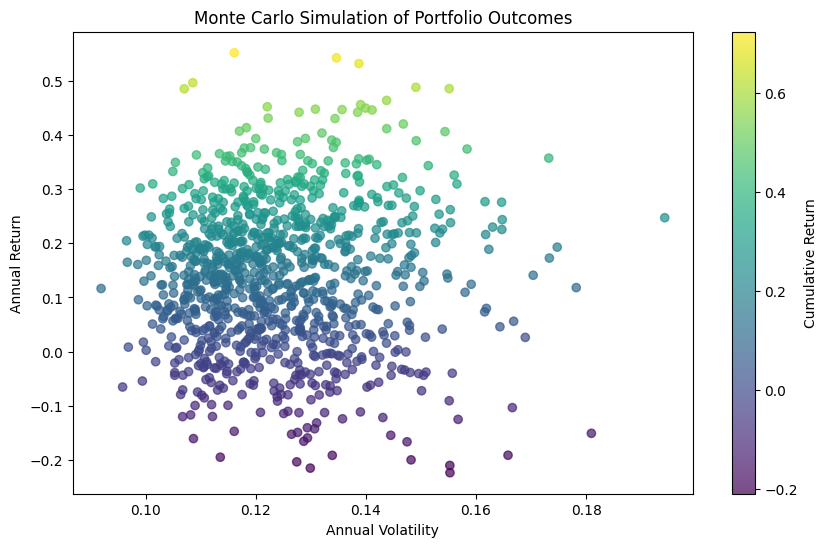

Portfolio with Maximum Sharpe Ratio:
Weights: [0.34568314 0.31738586 0.26004868 0.07688231]
Cumulative Return: 72.40%
Annual Return: 55.20%
Annual Volatility: 11.61%
Sharpe Ratio: 4.75


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# ---------------------------
# 1. Define simulation parameters
# ---------------------------
num_assets = 4            # Number of assets in the portfolio
num_days = 252            # Trading days in one year
num_simulations = 1000    # Number of Monte Carlo simulations

# Assumed average daily returns for each asset
mean_returns = np.array([0.0005, 0.0007, 0.0006, 0.0004])
# Assumed daily volatilities for each asset
volatilities = np.array([0.01, 0.012, 0.011, 0.009])

# Assume a correlation matrix among assets
corr_matrix = np.array([
    [1.0, 0.2, 0.3, 0.1],
    [0.2, 1.0, 0.4, 0.2],
    [0.3, 0.4, 1.0, 0.3],
    [0.1, 0.2, 0.3, 1.0]
])

# Compute the covariance matrix from volatilities and correlations
cov_matrix = np.outer(volatilities, volatilities) * corr_matrix

# ---------------------------
# 2. Monte Carlo Simulation
# ---------------------------
# We'll store simulation outcomes as a list of dictionaries
simulations = []

for sim in range(num_simulations):
    # Randomly generate portfolio weights that sum to 1 using a Dirichlet distribution
    weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]

    # Generate daily returns for each asset for num_days
    # Here we draw from a multivariate normal distribution that incorporates the covariance structure
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_days)

    # Compute the portfolio's daily return as the weighted sum of asset returns
    port_daily_returns = daily_returns.dot(weights)

    # Compute the cumulative return over the year
    cumulative_return = np.prod(1 + port_daily_returns) - 1
    # Annualized return is approximated by the average daily return scaled by number of days
    annual_return = np.mean(port_daily_returns) * num_days
    # Annualized volatility is daily volatility scaled by the square root of days
    annual_volatility = np.std(port_daily_returns) * np.sqrt(num_days)

    # Calculate the Sharpe Ratio (assuming a risk-free rate of zero for simplicity)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

    simulations.append({
        'Weights': weights,
        'Cumulative Return': cumulative_return,
        'Annual Return': annual_return,
        'Annual Volatility': annual_volatility,
        'Sharpe Ratio': sharpe_ratio
    })

# Convert simulation results into a DataFrame for further analysis
results_df = pd.DataFrame(simulations)

# ---------------------------
# 3. Analysis & Visualization
# ---------------------------
# Plotting the annual return vs. annual volatility for each simulation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df['Annual Volatility'], results_df['Annual Return'],
                      c=results_df['Cumulative Return'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.title('Monte Carlo Simulation of Portfolio Outcomes')
cbar = plt.colorbar(scatter)
cbar.set_label('Cumulative Return')
plt.show()

# Identify the portfolio with the highest Sharpe Ratio
max_sharpe = results_df.loc[results_df['Sharpe Ratio'].idxmax()]
print("Portfolio with Maximum Sharpe Ratio:")
print(f"Weights: {max_sharpe['Weights']}")
print(f"Cumulative Return: {max_sharpe['Cumulative Return']:.2%}")
print(f"Annual Return: {max_sharpe['Annual Return']:.2%}")
print(f"Annual Volatility: {max_sharpe['Annual Volatility']:.2%}")
print(f"Sharpe Ratio: {max_sharpe['Sharpe Ratio']:.2f}")
